<a href="https://colab.research.google.com/github/Mani9516/Amazon-Sentiment-Analysis/blob/main/Amazon_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Amazon Alexa Review - Sentiment Analysis**
Analyzing the Amazon Alexa dataset and building classification models to predict if the
sentiment of a given input sentence is positive or negative.

#**1. Importing Required Libraries**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import pickle
import re
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#**2. Exploratory Data Analysis**

In [ ]:
#Load the data
data = pd.read_csv("/content/amazon_alexa.tsv", delimiter = '\t', quoting = 3)
print(f"Dataset shape : {data.shape}")

Dataset shape : (3150, 5)


In [ ]:
data.head()


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
#Column names
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [ ]:
#Check for null values
data.isnull().sum()

,0
rating,0
date,0
variation,0
verified_reviews,1
feedback,0


In [ ]:
data[data['verified_reviews'].isna() == True]


,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [ ]:
data.dropna(inplace=True)


In [ ]:
data.shape

(3149, 5)

In [ ]:
data['length'] = data['verified_reviews'].apply(len)

In [ ]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [ ]:
print(f"'verified_reviews' column value: {data.iloc[10]['verified_reviews']}")
print(f"Length of review : {len(data.iloc[10]['verified_reviews'])}")
print(f"'length' column value : {data.iloc[10]['length']}")

'verified_reviews' column value: "I sent it to my 85 year old Dad, and he talks to it constantly."
Length of review : 65
'length' column value : 65


#**We can see that the length of review is the same as the value in the length column for that record Datatypes of the features**


In [ ]:
data.dtypes

,0
rating,int64
date,object
variation,object
verified_reviews,object
feedback,int64
length,int64



*  rating, feedback and length are integer values
* date, variation and verified_reviews are string values


#Analyzing 'rating' column
This column refers to the rating of the variation given by the user

In [ ]:
len(data)

3149

In [ ]:
data['rating'].value_counts()


,count
rating,
5,2286
4,455
1,161
3,152
2,95


#Let's plot the above values in a bar graph


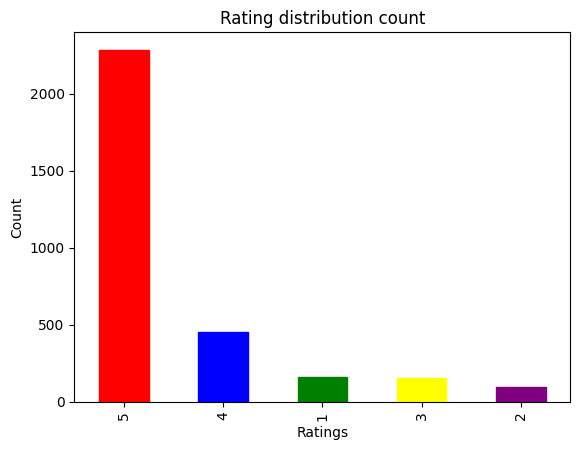

In [ ]:
ax = data['rating'].value_counts().plot.bar()
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')

colors = ['red', 'blue', 'green', 'yellow', 'purple']
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i % len(colors)])

plt.show()

In [ ]:
data['rating'].value_counts()/data.shape[0]*100,2

(rating
 5    72.594474
 4    14.449031
 1     5.112734
 3     4.826929
 2     3.016831
 Name: count, dtype: float64,
 2)

#Let's plot the above values in a pie chart


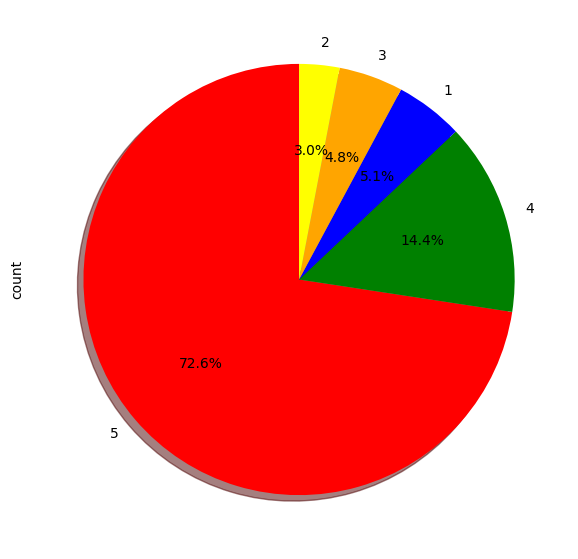

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','yellow')
wp = {'linewidth':1, "edgecolor":'black'}
tags = data['rating'].value_counts()/data.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90,)
from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

Analyzing 'feedback' column
This column refers to the feedback of the verified review

In [ ]:
#Distinct values of 'feedback' and its count
data['feedback'].value_counts()


,count
feedback,
1,2893
0,256


There are 2 distinct values of 'feedback' present - 0 and 1. Let's see what kind of review each
value corresponds to.
feedback value = 0


In [ ]:
review_0 = data[data['feedback'] == 0].iloc[50]['verified_reviews']
review_0

'Extremely low in volume'

In [ ]:
review_1 = data[data['feedback'] == 1].iloc[8]['verified_reviews']
review_1

'looks great'

From the above 2 examples we can see that feedback 0 is negative review and 1 is positive
review
Let's plot the feedback value count in a bar graph


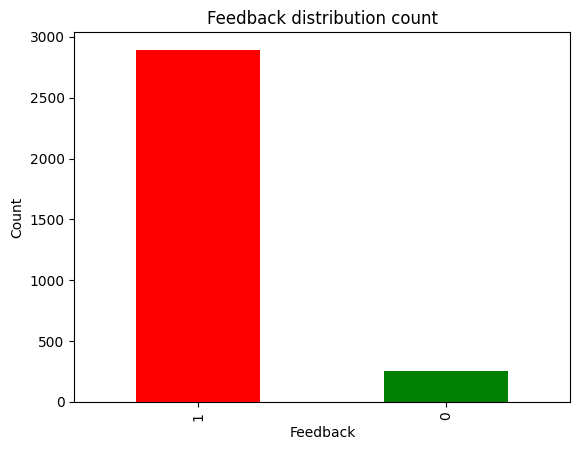

In [ ]:
data['feedback'].value_counts().plot.bar(color = ['red','green'])
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [ ]:
data['feedback'].value_counts()/data.shape[0]*100,2


(feedback
 1    91.870435
 0     8.129565
 Name: count, dtype: float64,
 2)

Feedback distribution

91.87% reviews are positive

8.13% reviews are negative

<Axes: ylabel='count'>

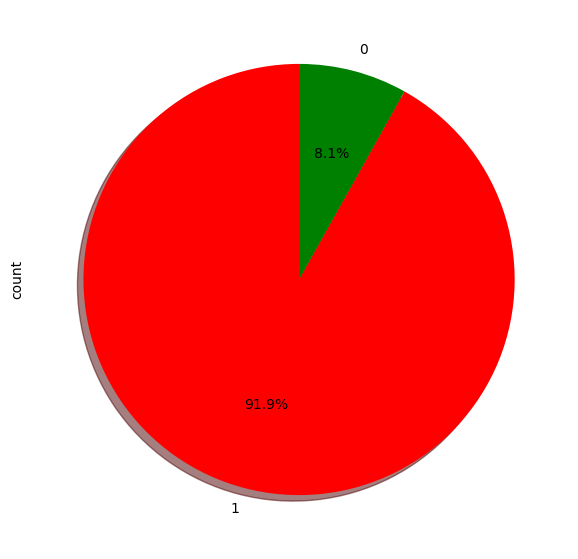

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green')
wp = {'linewidth':1, "edgecolor":'black'}
tags = data['feedback'].value_counts()/data.shape[0]
explode=(0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90,)

In [ ]:
data[data['feedback'] == 0]['rating'].value_counts()


,count
rating,
1,161
2,95


In [ ]:
#Feedback = 1
data[data['feedback'] == 1]['rating'].value_counts()

,count
rating,
5,2286
4,455
3,152


If rating of a review is 1 or 2 then the feedback is 0 (negative) and if the rating is 3, 4 or 5
then the feedback is 1 (positive).

#**Analyzing 'variation' column**

This column refers to the variation or type of Amazon Alexa product. Example - Black Dot,
Charcoal Fabric etc

In [ ]:
data['variation'].value_counts()


,count
variation,
Black Dot,516
Charcoal Fabric,430
Configuration: Fire TV Stick,350
Black Plus,270
Black Show,265
Black,261
Black Spot,241
White Dot,184
Heather Gray Fabric,157


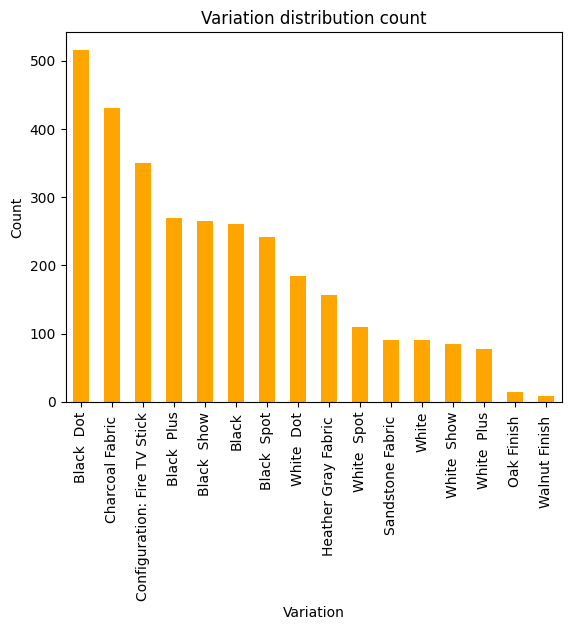

In [ ]:
#Bar graph to visualize the total counts of each variation
data['variation'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()


In [ ]:
data['variation'].value_counts()/data.shape[0]*100,2


(variation
 Black  Dot                      16.386154
 Charcoal Fabric                 13.655129
 Configuration: Fire TV Stick    11.114640
 Black  Plus                      8.574151
 Black  Show                      8.415370
 Black                            8.288346
 Black  Spot                      7.653223
 White  Dot                       5.843125
 Heather Gray Fabric              4.985710
 White  Spot                      3.461416
 Sandstone Fabric                 2.858050
 White                            2.858050
 White  Show                      2.699270
 White  Plus                      2.476977
 Oak Finish                       0.444586
 Walnut Finish                    0.285805
 Name: count, dtype: float64,
 2)

In [ ]:
data.groupby('variation')['rating'].mean()

,rating
variation,
Black,4.233716
Black Dot,4.453488
Black Plus,4.370370
Black Show,4.490566
Black Spot,4.311203
Charcoal Fabric,4.730233
Configuration: Fire TV Stick,4.591429
Heather Gray Fabric,4.694268
Oak Finish,4.857143


Let's analyze the above ratings

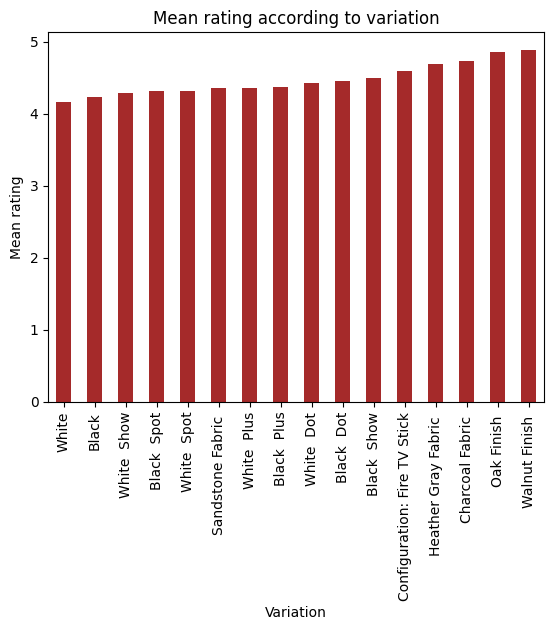

In [ ]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'brown',)
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

#**Analyzing 'verified_reviews' column**

This column contains the textual review given by the user for a variation for the product.


In [ ]:
data['length'].describe()

,length
count,3149.000000
mean,132.714513
std,182.541531
min,1.000000
25%,30.000000
50%,74.000000
75%,166.000000
max,2853.000000


[Text(0.5, 1.0, 'Distribution of length of review')]

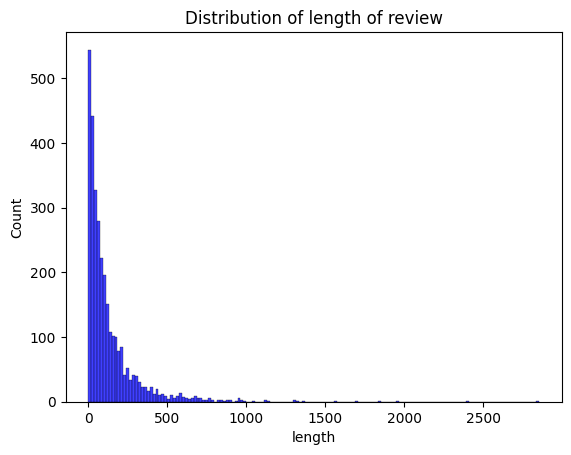

In [ ]:
sns.histplot(data['length'],color='blue').set(title='Distribution of length of review')


[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

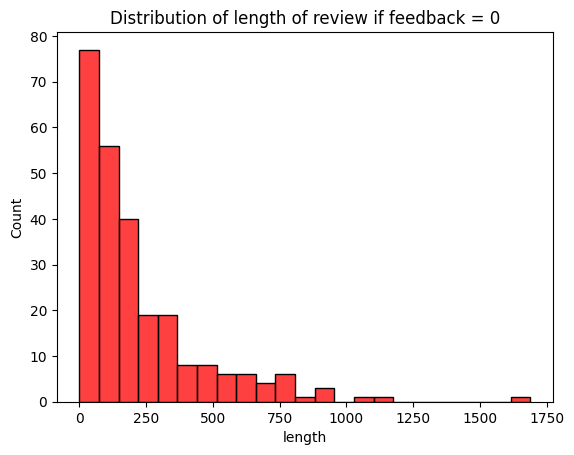

In [ ]:
sns.histplot(data[data['feedback']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')

Length analysis when feedback is 1

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

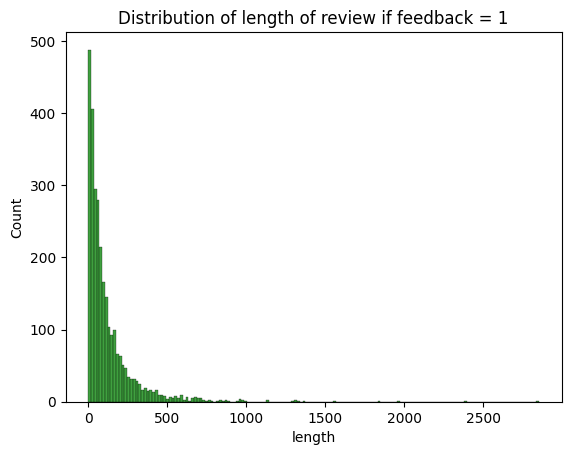

In [ ]:
sns.histplot(data[data['feedback']==1]['length'],color='green').set(title='Distribution of length of review if feedback = 1')

Lengthwise mean rating


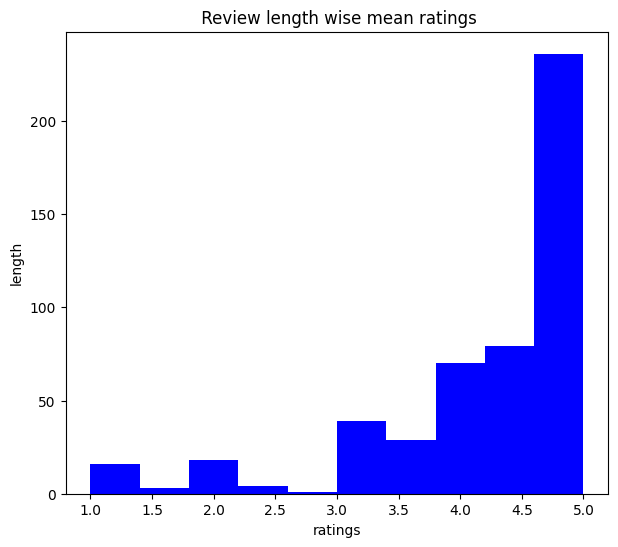

In [ ]:
data.groupby('length')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6),)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

In [ ]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)


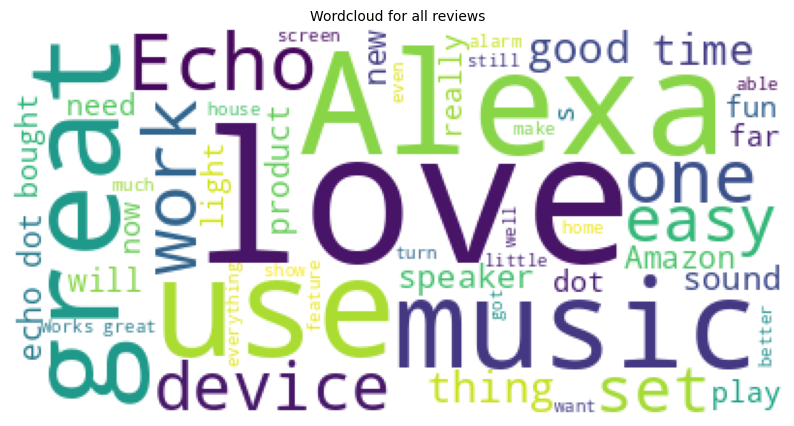

In [ ]:
# Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)
# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

Lets find the unique words in each feedback category


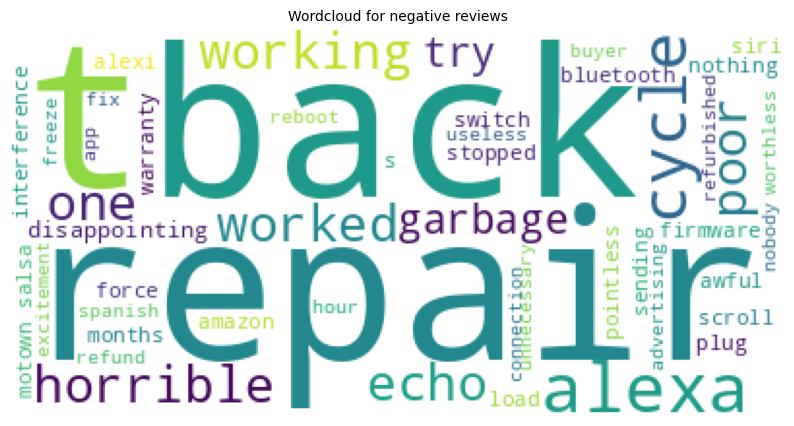

In [ ]:
# Combine all reviews for each feedback category and splitting them into individual
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']]) # Use 'verified_reviews' instead of 'verified'
neg_reviews = neg_reviews.lower().split()
pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']]) # Use 'verified_reviews' instead of 'verified'
pos_reviews = pos_reviews.lower().split()
#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)
unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)
wc = WordCloud(background_color='white', max_words=50)
# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

Negative words can be seen in the above word cloud - garbage, pointless, poor, horrible,
repair etc.


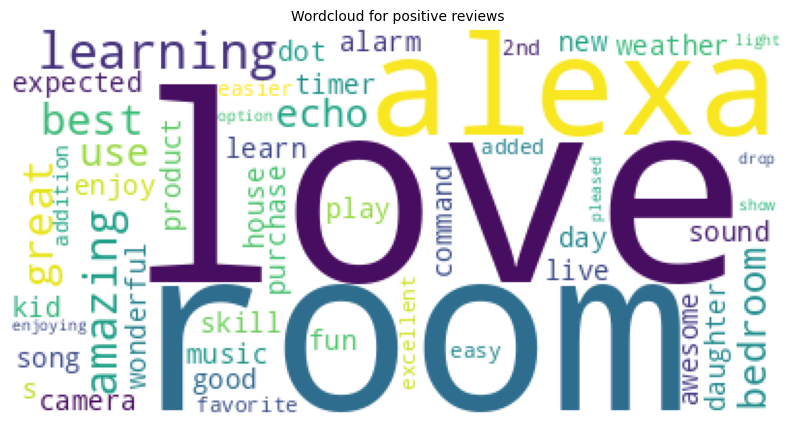

In [ ]:
wc = WordCloud(background_color='white', max_words=50)
# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()


Positive words can be seen in the above word cloud - good, enjoying, amazing, best, great
etc

**3. Preprocessing and Modelling
To build the corpus from the 'verified_reviews' we perform the following**
1. Replace any non alphabet characters with a space
2. Covert to lower case and split into words
3. Iterate over the individual words and if it is not a stopword then add the stemmed form
of the word to the corpus

In [ ]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
 review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
 review = review.lower().split()
 review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
 review = ' '.join(review)
 corpus.append(review)

Using Count Vectorizer to create bag of words


In [ ]:
cv = CountVectorizer(max_features = 2500)
#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [ ]:
#Saving the Count Vectorizer
pickle.dump(cv, open('countVectorizer.pkl', 'wb'))


Checking the shape of X and y


In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (3149, 2500)
y shape: (3149,)


Splitting data into train and test set with 30% data with testing.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,)
print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2204, 2500)
y train: (2204,)
X test: (945, 2500)
y test: (945,)


In [ ]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")


X train max value: 12
X test max value: 10


In [ ]:
#Class Imbalance by Sampling Technique
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
# Check class distribution before oversampling
print("Before oversampling:", Counter(y_train))
# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
# Perform oversampling
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
# Check class distribution after oversampling
print("After oversampling:", Counter(y_resampled))


Before oversampling: Counter({1: 2022, 0: 182})
After oversampling: Counter({1: 2022, 0: 2022})


We'll scale X_train and X_test so that all values are between 0 and 1.

In [ ]:
scaler = MinMaxScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
#Saving the scaler model
pickle.dump(scaler, open('scaler.pkl', 'wb'))


#Using all models for train and test

In [ ]:
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier # Import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# List of classifiers
classifiers = {
 'Logistic Regression': LogisticRegression(),
 'Random Forest': RandomForestClassifier(),
 'AdaBoost': AdaBoostClassifier(), ## BASIC BUT FAST BOOSTING TECHNIQUE
 'Bagging': BaggingClassifier(),
 'Extra Trees': ExtraTreesClassifier(), ## TREE BASED CLASSIFIER
 'Gradient Boosting': GradientBoostingClassifier(),
 'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
 'Decision Tree': DecisionTreeClassifier(),
 'SVM': SVC(probability=True), ## SUPPORT VECTOR MACHINES
 'KNN': KNeighborsClassifier(), ## K NEAREST NEIGHBOURS
 'Naive Bayes': GaussianNB() ## PROBABILITY BASED APPROACH
}
# Dictionaries to store results
results_train = {}
results_test = {}
# K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for name, clf in classifiers.items():
 # Cross-validation
 cv_results = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')
 results_train[name] = {
 'CrossVal_Score_Mean': cv_results.mean(),
 'CrossVal_Error': cv_results.std()
 }
 # Train the model
 clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
# The following line was incorrectly indented
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None # Added missing 'None' to handle cases without predict_proba
clf_report = classification_report(y_test,  y_pred)
cm = confusion_matrix(y_test, y_pred)
 # Store the evaluation metrics
results_test[name] = {  # Removed the extra space here
 'Accuracy': accuracy,
 'F1_Score': f1,
 'ROC_AUC_Score': roc_auc,
 'Classification_Report': clf_report,
 'Confusion_Matrix': cm
 }

In [ ]:
# Print the cross-validation results
for name, result in results_train.items():
 print(f"{name} (Training):")
 print(f" CrossVal_Score_Mean: {result['CrossVal_Score_Mean']:.4f}")
 print(f" CrossVal_Error: {result['CrossVal_Error']:.4f}")
 print()
# Print the test results
for name, result in results_test.items():
 print(f"{name} (Test):")
 print(f" Accuracy: {result['Accuracy']:.4f}")
 print(f" F1_Score: {result['F1_Score']:.4f}")
 print(f" ROC_AUC_Score: {result['ROC_AUC_Score']}")
 print(f" Classification_Report:\n{result['Classification_Report']}")
 print(f" Confusion_Matrix:\n{result['Confusion_Matrix']}\n")

Logistic Regression (Training):
 CrossVal_Score_Mean: 0.9328
 CrossVal_Error: 0.0116

Random Forest (Training):
 CrossVal_Score_Mean: 0.9351
 CrossVal_Error: 0.0143

AdaBoost (Training):
 CrossVal_Score_Mean: 0.9256
 CrossVal_Error: 0.0139

Bagging (Training):
 CrossVal_Score_Mean: 0.9233
 CrossVal_Error: 0.0098

Extra Trees (Training):
 CrossVal_Score_Mean: 0.9347
 CrossVal_Error: 0.0126

Gradient Boosting (Training):
 CrossVal_Score_Mean: 0.9238
 CrossVal_Error: 0.0124

XGBoost (Training):
 CrossVal_Score_Mean: 0.9269
 CrossVal_Error: 0.0150

Decision Tree (Training):
 CrossVal_Score_Mean: 0.9165
 CrossVal_Error: 0.0114

SVM (Training):
 CrossVal_Score_Mean: 0.9229
 CrossVal_Error: 0.0159

KNN (Training):
 CrossVal_Score_Mean: 0.9170
 CrossVal_Error: 0.0125

Naive Bayes (Training):
 CrossVal_Score_Mean: 0.6152
 CrossVal_Error: 0.0287

Naive Bayes (Test):
 Accuracy: 0.5852
 F1_Score: 0.7251
 ROC_AUC_Score: 0.5400285474912341
 Classification_Report:
              precision    recall  f

#Hyper Parameter Tuning

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
 'n_estimators': [50, 100, 200],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 20, 30, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]
}
### 3*3*4*3*3*2*5 = 3240 fits
# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
 cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
# Fit GridSearchCV
grid_search.fit(X_train, y_train)
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


Training the model with best hyper parameter

In [ ]:
# Train the Random Forest model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)
# Make predictions on the training set
y_train_pred = best_rf.predict(X_train)
y_train_pred_proba = best_rf.predict_proba(X_train)[:, 1]
# Make predictions on the test set
y_test_pred = best_rf.predict(X_test)
y_test_pred_proba = best_rf.predict_proba(X_test)[:, 1]
# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_clf_report = classification_report(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
test_clf_report = classification_report(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
# Print the evaluation metrics
print("Training Metrics:")
print(f" Accuracy: {train_accuracy:.4f}")
print(f" F1_Score: {train_f1:.4f}")
print(f" ROC_AUC_Score: {train_roc_auc:.4f}")
print(f" Classification_Report:\n{train_clf_report}")
print(f" Confusion_Matrix:\n{train_cm}\n")
print("Test Metrics:")
print(f" Accuracy: {test_accuracy:.4f}")
print(f" F1_Score: {test_f1:.4f}")
print(f" ROC_AUC_Score: {test_roc_auc:.4f}")
print(f" Classification_Report:\n{test_clf_report}")
print(f" Confusion_Matrix:\n{test_cm}\n")


Training Metrics:
 Accuracy: 0.9936
 F1_Score: 0.9966
 ROC_AUC_Score: 0.9990
 Classification_Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       182
           1       0.99      1.00      1.00      2022

    accuracy                           0.99      2204
   macro avg       1.00      0.96      0.98      2204
weighted avg       0.99      0.99      0.99      2204

 Confusion_Matrix:
[[ 168   14]
 [   0 2022]]

Test Metrics:
 Accuracy: 0.9376
 F1_Score: 0.9669
 ROC_AUC_Score: 0.9274
 Classification_Report:
              precision    recall  f1-score   support

           0       0.74      0.31      0.44        74
           1       0.94      0.99      0.97       871

    accuracy                           0.94       945
   macro avg       0.84      0.65      0.70       945
weighted avg       0.93      0.94      0.93       945

 Confusion_Matrix:
[[ 23  51]
 [  8 863]]



#Confusion Matrix


In [ ]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix\n\n', cm)


Confusion matrix

 [[ 23  51]
 [  8 863]]


In [ ]:
print("True Positive : ", cm[1, 1])
print("True Negative : ", cm[0, 0])
print("False Positive: ", cm[0, 1])
print("False Negative: ", cm[1, 0])


True Positive :  863
True Negative :  23
False Positive:  51
False Negative:  8


<Axes: >

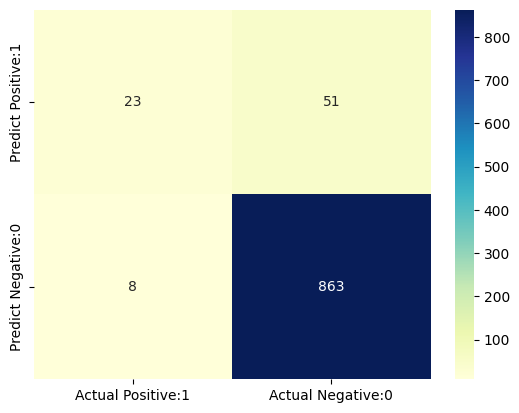

In [ ]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


#Classification Report


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.31      0.44        74
           1       0.94      0.99      0.97       871

    accuracy                           0.94       945
   macro avg       0.84      0.65      0.70       945
weighted avg       0.93      0.94      0.93       945

